In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=1e-3
wd=1e-4
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


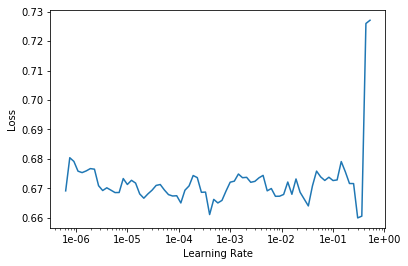

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:12
epoch  train_loss  valid_loss  accuracy
1      0.609961    0.503650    0.743961  (00:03)
2      0.615612    0.530536    0.710145  (00:02)
3      0.537883    0.480207    0.729469  (00:03)
4      0.528494    0.482304    0.710145  (00:03)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:58
epoch  train_loss  valid_loss  accuracy
1      0.561990    0.584896    0.719807  (00:05)
2      0.536699    0.491551    0.777778  (00:05)
3      0.511851    0.452903    0.748792  (00:07)
4      0.522781    0.391763    0.782609  (00:05)
5      0.488093    0.360925    0.821256  (00:05)
6      0.469136    0.318706    0.850242  (00:06)
7      0.490582    0.341533    0.850242  (00:05)
8      0.453907    0.339117    0.859903  (00:05)
9      0.438566    0.348557    0.850242  (00:05)
10     0.398901    0.348257    0.845411  (00:06)
11     0.414342    0.334853    0.855072  (00:05)
12     0.388848    0.290480    0.888889  (00:05)
13     0.378692    0.276543    0.874396  (00:05)
14     0.394458    0.338029    0.859903  (00:05)
15     0.324926    0.468836    0.801932  (00:06)
16     0.365865    0.320063    0.874396  (00:05)
17     0.305399    0.350674    0.850242  (00:06)
18     0.293576    0.354587    0.864734  (00:06)
19     0.334240    0.336466    0.874396  (00:05)
20     0.29

In [11]:
learn.validate()

[0.3347451, tensor(0.8792)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

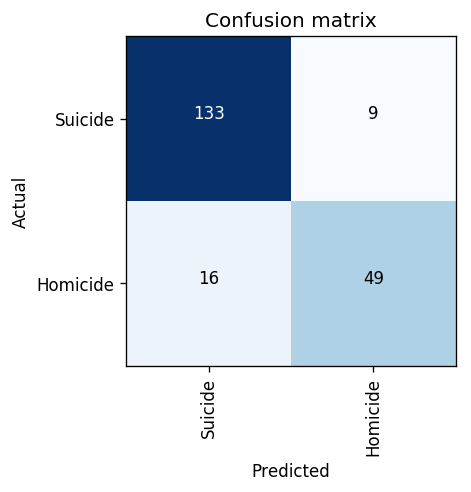

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

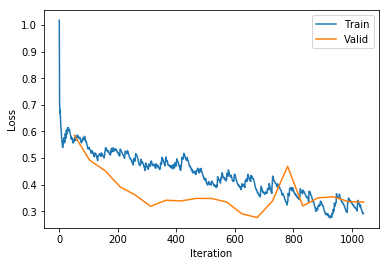

In [14]:
learn.recorder.plot_losses()

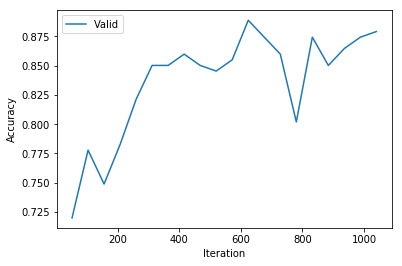

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


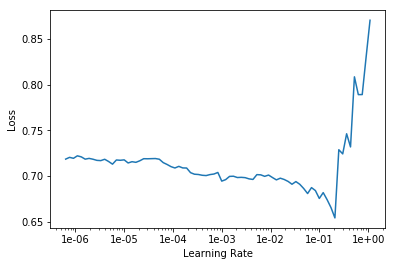

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:11
epoch  train_loss  valid_loss  accuracy
1      0.649484    0.534722    0.753623  (00:02)
2      0.632285    0.499222    0.753623  (00:02)
3      0.562415    0.489447    0.787440  (00:03)
4      0.574184    0.543332    0.758454  (00:02)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:01
epoch  train_loss  valid_loss  accuracy
1      0.555456    0.545144    0.748792  (00:05)
2      0.499207    0.511299    0.777778  (00:06)
3      0.496758    0.394503    0.826087  (00:06)
4      0.474211    0.377907    0.845411  (00:06)
5      0.473064    0.390713    0.787440  (00:05)
6      0.463425    0.351503    0.855072  (00:06)
7      0.454863    0.389113    0.845411  (00:05)
8      0.400775    0.307172    0.884058  (00:06)
9      0.364328    0.297519    0.864734  (00:06)
10     0.399255    0.401344    0.830918  (00:06)
11     0.385584    0.352934    0.869565  (00:05)
12     0.412164    0.336869    0.864734  (00:05)
13     0.376730    0.316672    0.840580  (00:05)
14     0.294008    0.306065    0.874396  (00:06)
15     0.372411    0.406119    0.850242  (00:05)
16     0.284422    0.271785    0.869565  (00:06)
17     0.367371    0.300023    0.874396  (00:05)
18     0.393195    0.281649    0.884058  (00:05)
19     0.372565    0.307789    0.859903  (00:05)
20     0.28

In [21]:
learn.validate()

[0.30863017, tensor(0.8696)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

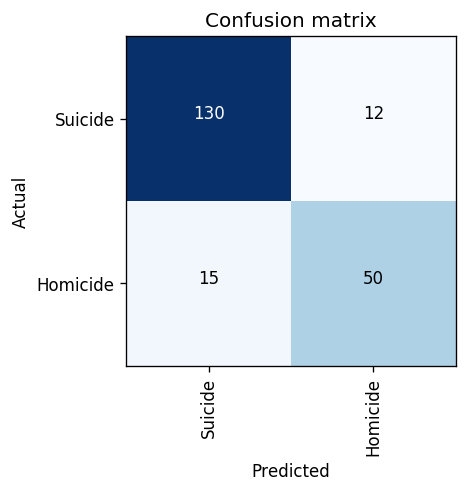

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

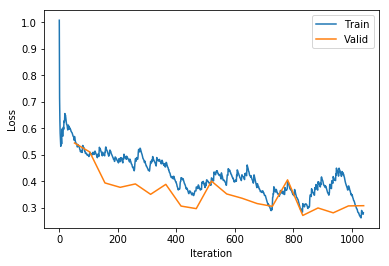

In [24]:
learn.recorder.plot_losses()

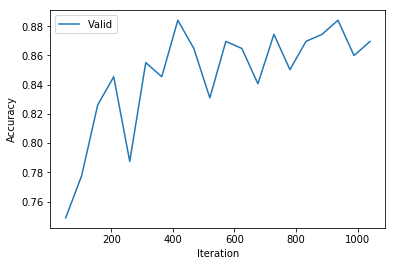

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


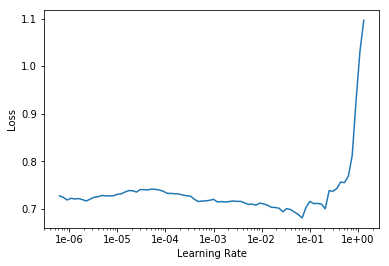

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:12
epoch  train_loss  valid_loss  accuracy
1      0.625240    0.558346    0.739130  (00:03)
2      0.608506    0.493972    0.763285  (00:03)
3      0.607347    0.532813    0.748792  (00:02)
4      0.544732    0.500336    0.777778  (00:03)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:04
epoch  train_loss  valid_loss  accuracy
1      0.567715    0.479199    0.763285  (00:06)
2      0.543920    0.491754    0.763285  (00:06)
3      0.493595    0.446624    0.801932  (00:06)
4      0.472290    0.422028    0.801932  (00:06)
5      0.511732    0.416828    0.782609  (00:05)
6      0.462424    0.360565    0.835749  (00:06)
7      0.415301    0.341390    0.864734  (00:06)
8      0.423589    0.342830    0.821256  (00:06)
9      0.392911    0.349297    0.840580  (00:06)
10     0.370463    0.309000    0.864734  (00:06)
11     0.328008    0.289352    0.859903  (00:06)
12     0.328830    0.312169    0.874396  (00:07)
13     0.357941    0.703868    0.748792  (00:06)
14     0.388940    0.389792    0.864734  (00:05)
15     0.343211    0.280123    0.884058  (00:06)
16     0.293345    0.359852    0.874396  (00:06)
17     0.331932    0.296896    0.869565  (00:05)
18     0.338604    0.398275    0.850242  (00:05)
19     0.290452    0.287972    0.884058  (00:06)
20     0.32

In [31]:
learn.validate()

[0.28181925, tensor(0.8792)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

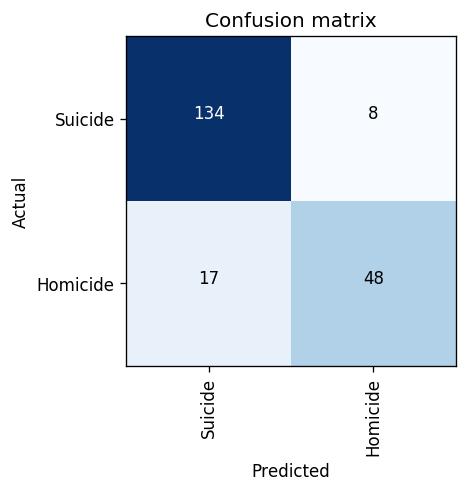

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

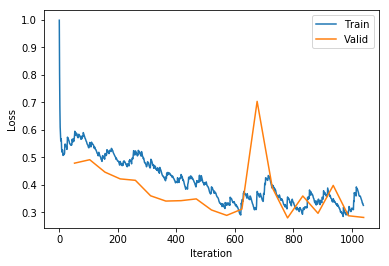

In [34]:
learn.recorder.plot_losses()

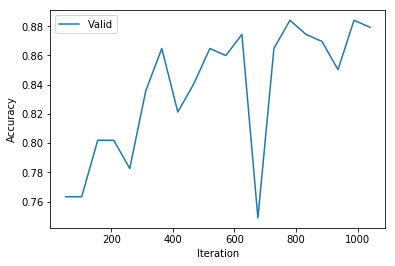

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


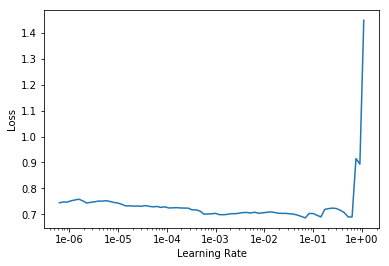

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:12
epoch  train_loss  valid_loss  accuracy
1      0.640705    0.512557    0.782609  (00:03)
2      0.627447    0.519130    0.763285  (00:03)
3      0.538154    0.489135    0.768116  (00:03)
4      0.496860    0.508553    0.777778  (00:03)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:59
epoch  train_loss  valid_loss  accuracy
1      0.575243    0.545134    0.739130  (00:05)
2      0.540964    0.534045    0.724638  (00:06)
3      0.540445    0.555894    0.729469  (00:05)
4      0.482443    0.475055    0.748792  (00:06)
5      0.468664    0.417613    0.806763  (00:06)
6      0.491309    0.389933    0.797101  (00:05)
7      0.462534    0.462540    0.801932  (00:05)
8      0.483932    0.436262    0.758454  (00:05)
9      0.426198    0.512808    0.787440  (00:06)
10     0.390192    0.293993    0.874396  (00:06)
11     0.423901    0.320863    0.840580  (00:05)
12     0.397649    0.315435    0.845411  (00:06)
13     0.375052    0.353263    0.840580  (00:06)
14     0.387020    0.320693    0.845411  (00:05)
15     0.337998    0.321399    0.845411  (00:06)
16     0.347899    0.334177    0.869565  (00:05)
17     0.336846    0.309432    0.859903  (00:05)
18     0.320133    0.265863    0.893720  (00:05)
19     0.284457    0.313397    0.874396  (00:06)
20     0.33

In [41]:
learn.validate()

[0.32261333, tensor(0.8551)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

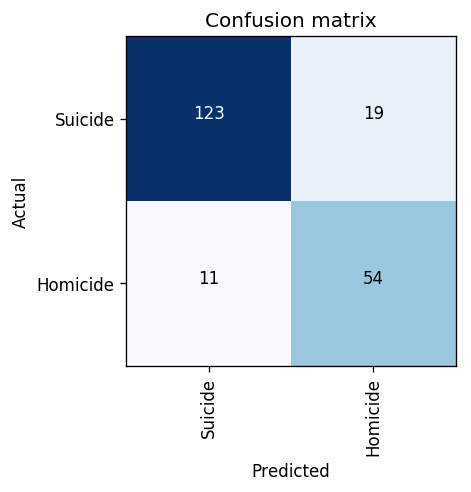

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

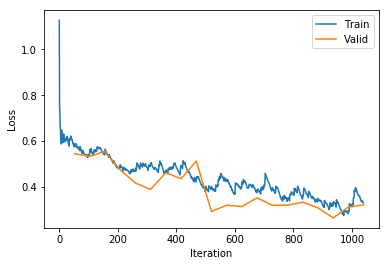

In [44]:
learn.recorder.plot_losses()

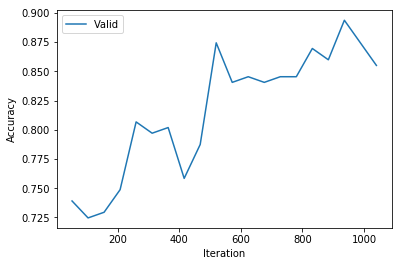

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


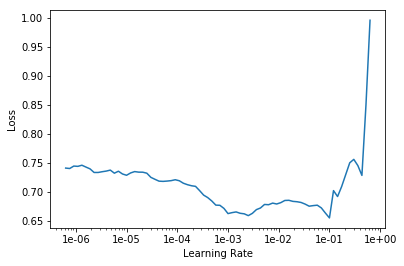

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:12
epoch  train_loss  valid_loss  accuracy
1      0.584646    0.561136    0.763285  (00:03)
2      0.583480    0.477493    0.743961  (00:03)
3      0.557850    0.476801    0.797101  (00:03)
4      0.556696    0.484460    0.714976  (00:02)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:52
epoch  train_loss  valid_loss  accuracy
1      0.551158    0.489417    0.811594  (00:06)
2      0.522852    0.363383    0.840580  (00:06)
3      0.489673    0.391431    0.816425  (00:06)
4      0.468343    0.371798    0.840580  (00:06)
5      0.500143    0.392417    0.826087  (00:05)
6      0.475220    0.373390    0.826087  (00:06)
7      0.488114    0.339912    0.859903  (00:05)
8      0.426890    0.291294    0.884058  (00:06)
9      0.429346    0.302726    0.874396  (00:06)
10     0.439923    0.315318    0.864734  (00:05)
11     0.391014    0.295006    0.864734  (00:05)
12     0.345175    0.340551    0.840580  (00:06)
13     0.298917    0.425615    0.850242  (00:06)
14     0.290393    0.313652    0.884058  (00:06)
15     0.250548    0.523675    0.816425  (00:03)
16     0.277344    0.299092    0.864734  (00:02)
17     0.388293    0.287411    0.864734  (00:03)
18     0.294180    0.280470    0.888889  (00:05)
19     0.340411    0.348104    0.879227  (00:05)
20     0.32

In [51]:
learn.validate()

[0.29486203, tensor(0.8792)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

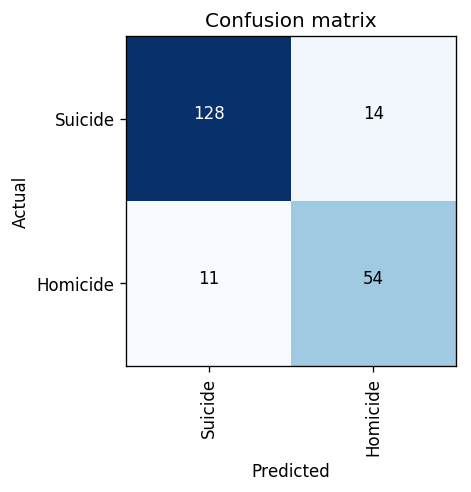

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

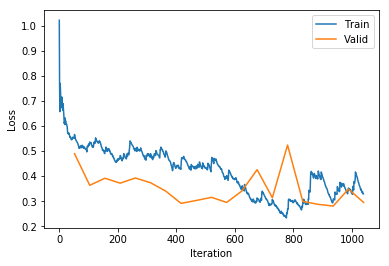

In [54]:
learn.recorder.plot_losses()

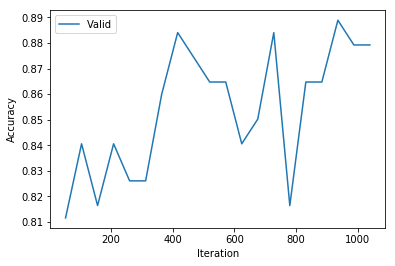

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8792270421981812, 0.8695651888847351, 0.8792270421981812, 0.8550724387168884, 0.8792270421981812]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.8724637508392334


In [58]:
print(statistics.variance(accuracy_list))

0.00011202143218973504


In [59]:
import torch

torch.cuda.empty_cache()